Rozptyl maskoff_tone:  2.7137556650521537
Střední hodnota maskoff_tone:  154.6826970179408
Rozptyl maskon_tone:  13.072347503071335
Střední hodnota maskon_tone:  154.95905600132565


[Text(0.5, 469.6246153846157, 'vzorky'), Text(63.0, 0.5, 'y')]

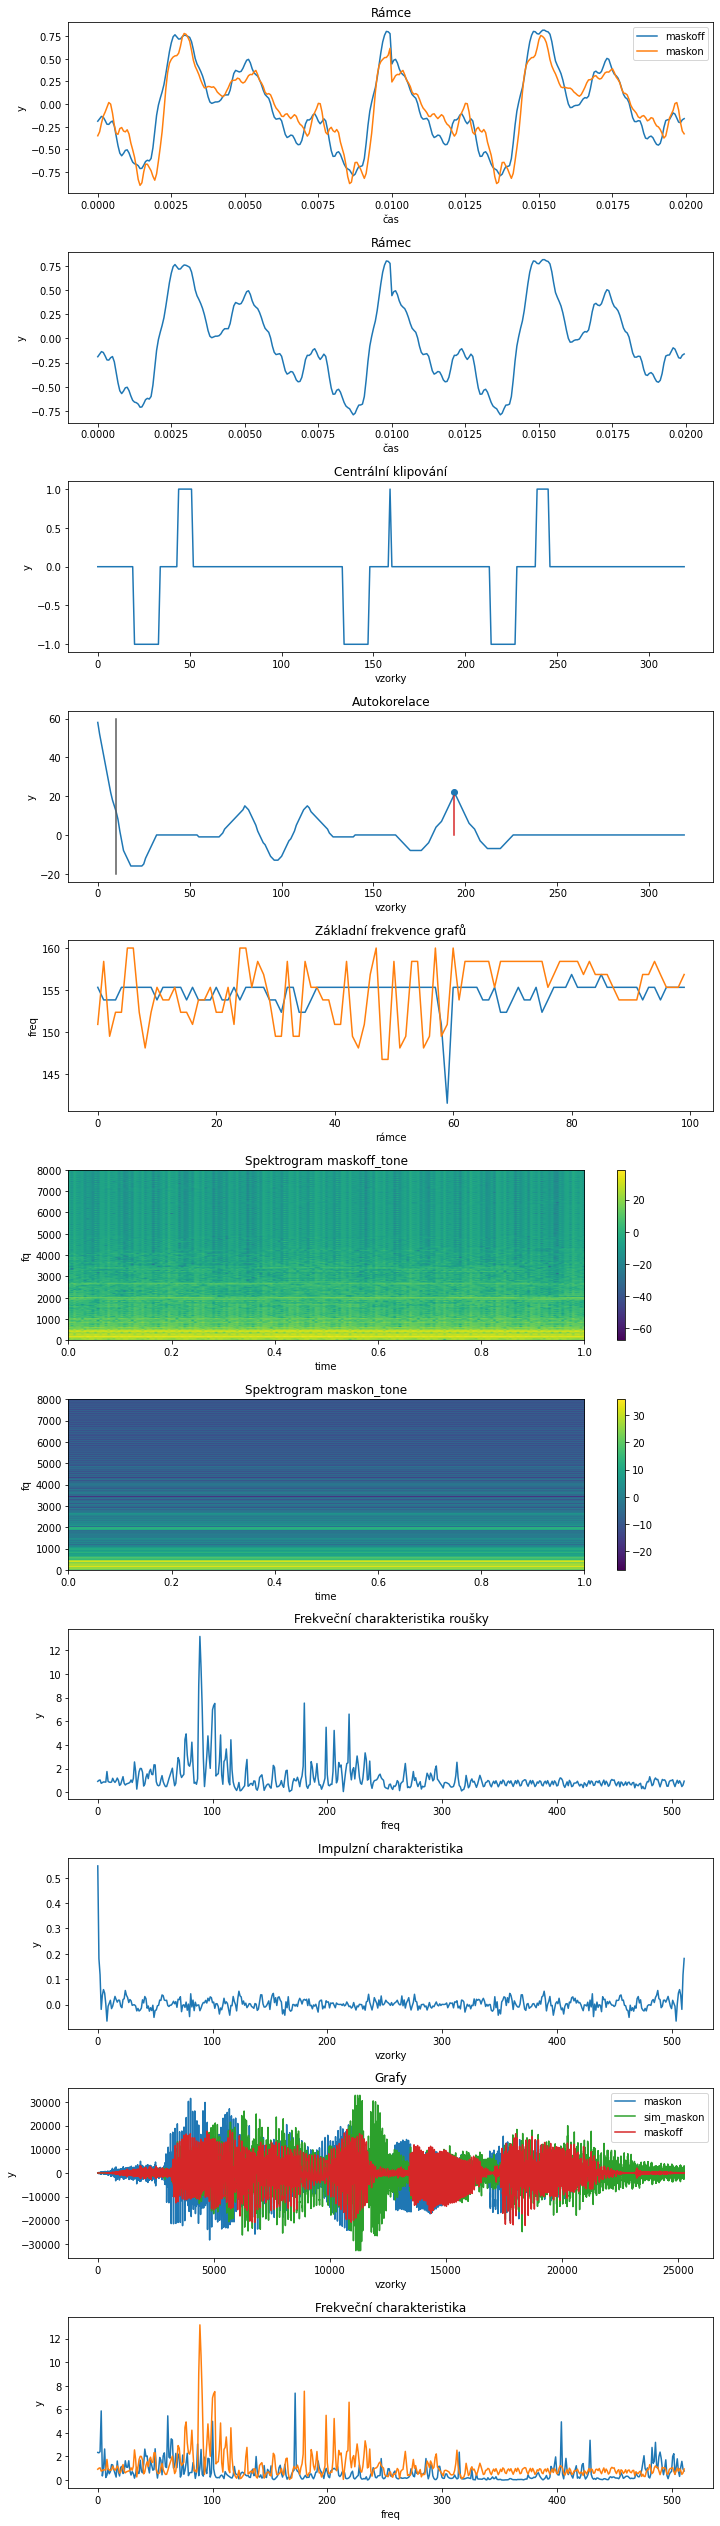

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import soundfile
from scipy import signal

# ---------- functions ----------
def clipping(var):
    clipping_list = []
    for i in var:
        if i > abs(max(var))*0.7:
            clipping_list.append(1)
        elif i < abs(max(var))*-0.7:
            clipping_list.append(-1)
        else:
            clipping_list.append(0)
    return clipping_list

def autocorrelation(x):
    res = np.correlate(x,x,mode="full")
    return res[res.size//2 :]

def DFT(x):
    x = np.asarray(x, dtype=complex)
    M = x.shape[0]
    f = x.copy()
    for i in range(M):
        sum = 0
        for j in range(M):
            tmp = x[j]*np.exp(-2j*np.pi*j*i*np.divide(1, M, dtype=complex))
            sum += tmp
        f[i] = sum
    return f

def iDFT(x):
    x = np.asarray(x, dtype=complex)
    M = x.shape[0]
    f = np.zeros(M, dtype=complex)
    for i in range(M):
        sum = 0
        for j in range(M):
            tmp = x[j]*np.exp(2j*np.pi*i*j*np.divide(1, M, dtype=complex))
            sum += tmp
        f[i] = np.divide(sum, M, dtype=complex)
    return f

#-------- end functions ---------



from scipy.io import wavfile
maskoff_tone_fs,    maskoff_tone_data = wavfile.read('maskoff_tone.wav')
maskon_tone_fs,     maskon_tone_data = wavfile.read('maskon_tone.wav')
maskoff_sentence_fs,maskoff_sentence_data = wavfile.read('maskoff_sentence.wav')
maskon_sentence_fs, maskon_sentence_data = wavfile.read('maskon_sentence.wav')

maskoff_tone = maskoff_tone_data[12000:28000]
maskon_tone = maskon_tone_data[10000:26000]    
maskoff_sentence = maskoff_sentence_data[10000:26000]
maskon_sentence = maskon_sentence_data[10000:26000]

#plt.plot(maskoff_sentence)

maskoff_tone = maskoff_tone - np.mean(maskoff_tone)
maskon_tone = maskon_tone - np.mean(maskon_tone)
maskoff_sentence = maskoff_sentence - np.mean(maskoff_sentence)
maskon_sentence = maskon_sentence - np.mean(maskon_sentence)

#plt.plot(maskoff_sentence)

maskoff_tone = maskoff_tone/np.abs(maskoff_tone).max()
maskon_tone = maskon_tone/np.abs(maskon_tone).max()
maskoff_sentence = maskoff_sentence/np.abs(maskoff_sentence).max()
maskon_sentence = maskon_sentence/np.abs(maskon_sentence).max()



final_list1 = [[maskoff_tone[160*j+i] for i in range(160)] for j in range(int(len(maskoff_tone)/160))]
final_list2 = [[maskon_tone[160*j+i] for i in range(160)] for j in range(int(len(maskon_tone)/160))]
final_list3 = [[maskoff_sentence[160*j+i] for i in range(160)] for j in range(int(len(maskoff_sentence)/160))]
final_list4 = [[maskon_sentence[160*j+i] for i in range(160)] for j in range(int(len(maskon_sentence)/160))]


#plt.imshow(final_list1,origin='lower')
final_list1_par = [[maskoff_tone[160*j+i+80] for i in range(160)] for j in range(int((len(maskoff_tone)-80)/160))]
final_list2_par = [[maskon_tone[160*j+i+80] for i in range(160)] for j in range(int((len(maskon_tone)-80)/160))]
final_list3_par = [[maskoff_sentence[160*j+i+80] for i in range(160)] for j in range(int((len(maskoff_sentence)-80)/160))]
final_list4_par = [[maskon_sentence[160*j+i+80] for i in range(160)] for j in range(int((len(maskon_sentence)-80)/160))]

fig,axs = plt.subplots(11,1, figsize=(10, 35))


num = 0
mylist1 = []
for i in final_list1_par:
    mylist1.append(final_list1[num])
    mylist1.append(i)
    num += 1

num = 0
mylist2 = []
for i in final_list2_par:
    mylist2.append(final_list2[num])
    mylist2.append(i)
    num += 1

num = 0
mylist3 = []
for i in final_list3_par:
    mylist3.append(final_list3[num])
    mylist3.append(i)
    num += 1

num = 0
mylist4 = []
for i in final_list4_par:
    mylist4.append(final_list4[num])
    mylist4.append(i)
    num += 1

num = 0
#plt.imshow(mylist)
#listy1 = mylist1[60] + mylist1[61]
#listy2 = mylist2[60] + mylist2[61]
#listy3 = mylist3[60] + mylist3[61]
#listy4 = mylist4[60] + mylist4[61]

listy1 = []
listy2 = []
listy3 = []
listy4 = []
numm = []
autocores = []
clippings = []
frekvence = []

for i in range(len(mylist1)-1):
    tmp = mylist1[i] + mylist1[i+1]
    listy1.append(tmp)

for i in range(len(mylist2)-1):
    tmp = mylist2[i] + mylist2[i+1]
    listy2.append(tmp)

for i in range(len(mylist3)-1):
    tmp = mylist3[i] + mylist3[i+1]
    listy3.append(tmp)

for i in range(len(mylist4)-1):
    tmp = mylist4[i] + mylist4[i+1]
    listy4.append(tmp)

for i in listy1:
    clippings.append(clipping(i))
for i in clippings:
    autocores.append(autocorrelation(i))

num = 0
for i in autocores:    
    peak = np.argmax(np.diff(i))
    frekvence.append(1/peak*16000)
tmp = frekvence
frekvence = []
for i in range(len(tmp)):
    if 90 <= tmp[i] <= 200:
        frekvence.append(tmp[i])

axs[4].plot(frekvence[:100])
var = 0.0
for i in range(len(frekvence[0:100])):
     var += ((frekvence[i] - np.mean(frekvence[0:100])) ** 2)
varx = var/len(frekvence[0:100])
print("Rozptyl maskoff_tone: ", varx)
print("Střední hodnota maskoff_tone: ", np.mean(frekvence[0:100]))

ff1 = []
for i in range(len(frekvence)):
    if np.average(frekvence)-1 < frekvence[i] < np.average(frekvence)+1:
        ff1.append(i) 


##########
frekvence = []
clippings = []
autocores = []
for i in listy2:
    clippings.append(clipping(i))
for i in clippings:
    autocores.append(autocorrelation(i))
num = 0
for i in autocores:    
    peak = np.argmax(np.diff(i))
    frekvence.append(1/peak*16000)
tmp = frekvence
frekvence = []
for i in range(len(tmp)):
    if 90<= tmp[i] <= 200:
        frekvence.append(tmp[i])

var = 0.0
for i in range(len(frekvence[0:100])):
     var += ((frekvence[i] - np.mean(frekvence[0:100])) ** 2)
     
varx = var/len(frekvence[0:100])
print("Rozptyl maskon_tone: ", varx)
print("Střední hodnota maskon_tone: ", np.mean(frekvence[0:100]))


x = np.arange(0,320)/16000
axs[0].plot(x,listy1[60],'C0',label='maskoff')
axs[0].plot(x,listy2[60],'C1',label='maskon')
axs[0].legend()
axs[1].plot(x,listy1[60])
axs[0].set_title("Rámce")
axs[1].set_title("Rámec")
axs[2].plot(clippings[60])
axs[2].set_title("Centrální klipování")
axs[3].plot(autocores[60])
axs[3].scatter(194,22)
axs[3].plot([194,194],[20,0],'C3')
axs[3].plot([10,10],[-20,60],c='0.35')
axs[3].set_title("Autokorelace")
axs[4].plot(frekvence[:100])
axs[4].set_title("Základní frekvence grafů")
axs[0].set(xlabel='čas', ylabel='y')
axs[1].set(xlabel='čas', ylabel='y')
axs[2].set(xlabel='vzorky', ylabel='y')
axs[3].set(xlabel='vzorky', ylabel='y')
axs[4].set(xlabel='rámce', ylabel='freq')
fig.tight_layout()


###############13uloha#####
ff2 = []
ff3 = []
ff4 = []
Ff1 = []
Ff2 = []
Ff3 = []
Ff4 = []
FF1 = []
FF2 = []
FF3 = []
FF4 = []
HFF12 = []
HFF34 = []


for i in range(len(frekvence)):
    if np.average(frekvence)+2 < frekvence[i] < np.average(frekvence)+4:
        ff2.append(i) 

frekvence = []
clippings = []
autocores = []
for i in listy3:
    clippings.append(clipping(i))
for i in clippings:
    autocores.append(autocorrelation(i))
num = 0
for i in autocores:    
    peak = np.argmax(np.diff(i))
    frekvence.append(1/peak*16000)
n = np.bincount(frekvence)
count = np.argmax(n)
for i in range(len(frekvence)):
    if count-1 < frekvence[i] < count+1:
        ff3.append(i) 


frekvence = []
clippings = []
autocores = []
for i in listy4:
    clippings.append(clipping(i))
for i in clippings:
    autocores.append(autocorrelation(i))
num = 0
for i in autocores:    
    peak = np.argmax(np.diff(i))
    frekvence.append(1/peak*16000)
n = np.bincount(frekvence)
count = np.argmax(n)
for i in range(len(frekvence)):
    if count-1 < frekvence[i] < count+1:
        ff4.append(i) 

for i in range(len(listy1)):
    if i in ff1:
        Ff1.append(listy1[i])
for i in range(len(listy2)):
    if i in ff2:
        Ff2.append(listy2[i])
for i in range(len(listy3)):
    if i in ff3:
        Ff3.append(listy3[i])
for i in range(len(listy4)):
    if i in ff4:
        Ff4.append(listy4[i])

for i in Ff1:
    while len(i) <= 1024:
        i.append(0.0)
    FF1 = np.fft.fft(i)
for i in Ff2:
    while len(i) <= 1024:
        i.append(0.0)
    FF2 = np.fft.fft(i)
for i in Ff3:
    while len(i) <= 1024:
        i.append(0.0)
    FF3 = np.fft.fft(i)
for i in Ff4:
    while len(i) <= 1024:
        i.append(0.0)
    FF4 = np.fft.fft(i)    

for i in range(len(FF1)):
    HFF12.append(abs(FF2[i])/abs(FF1[i]))
for i in range(len(FF3)):
    HFF34.append(abs(FF4[i])/abs(FF3[i]))

Impulss = np.fft.ifft(HFF12)
Impulsss = np.fft.ifft(HFF34)
Impuls12_print = []
#Impuls12 = np.fft.ifft(HFF12)
#Impuls34 = np.fft.ifft(HFF34)
#Impuls12 = Impuls12[0:512]
#Impuls34 = Impuls34[0:512]

axs[10].plot(HFF34[0:512])

maskoff_tone_data = maskoff_tone_data - np.mean(maskoff_tone_data)
maskoff_tone_data = maskoff_tone_data/np.abs(maskoff_tone_data).max()
maskoff_sentence_data = maskoff_sentence_data - np.mean(maskoff_sentence_data)
maskoff_sentence_data = maskoff_sentence_data/np.abs(maskoff_sentence_data).max()

signalF1 = scipy.signal.lfilter(Impulsss,Impulss,maskoff_tone_data)
signalF2 = scipy.signal.lfilter(Impulsss,Impulss,maskoff_sentence_data)
signalF1 = np.real(signalF1)
signalF2 = np.real(signalF2)

#plt.plot(signal)

soundfile.write("sim_maskon_tone_only_match.wav",signalF1,16000)
soundfile.write("sim_maskon_sentence_only_match.wav",signalF2,16000)








#j=0
###lagz=[]
#for i in autocores:
#    lag = max(i[5:])
#    numero = np.where(i == lag)[0]
#    numm.append(max(numero))
#    fs = 16000
#    d = np.diff(i)
#    start = np.nonzero(d > 0)[0][0]
#    peak = np.argmax(i[start:]) + start
    
#    px, py = parabolic(i, peak)
#    j += 1
##    numm.append(maskoff_tone_fs/px)
 #   lagz.append(peak/20)
#plt.plot(lagz)
#plt.plot(numm)
#print(numm)
#plt.plot(listy1)
#plt.plot(listy2)

#clipping1 = clipping(listy1)
#clipping2 = clipping(listy2)
#clipping3 = clipping(listy3)
#clipping4 = clipping(listy4)


#newlist = []
#sum = 0.0
#num = 0.0

#autocorrelation manual
#for i in range(len(clipping1)):
#    for j in range(len(clipping1)-i):
#        num = clipping1[j] * clipping1[j+i]  
#        sum += num
#    newlist.append ( 1 / (max(clipping1) - min(clipping1)) * sum)


#autocorr1 = autocorrelation(clipping1)
#autocorr2 = autocorrelation(clipping2)
#autocorr3 = autocorrelation(clipping3)
#autocorr4 = autocorrelation(clipping4)

#plt.plot(autocorr4)

# Testing for the same f0 frequency
#for i in range(len(mylist2)):
#    cliper = clipping(mylist2[i])
#    autoss = autocorrelation(cliper)
#    plt.plot(autoss)

#plt.plot(autocorrelation(clipping1))

#lag1 = max(autocorr1[5:])
#numm = np.where(autocorr1 == lag1)
#numm

#1 / rk(argmax) * Fs
#rk(argmax) - index najvyššieho korelačného koeficientu


#plt.imshow(final_list1,origin='lower')

#####  LE-FOURIER ######
G,GG,GGG = [],[],[]
GJ,GGJ,GGGJ = [],[],[]
Fourier1 = []
Fourier2 = []
Fourier3 = []
Fourier4 = []

for i in listy1:
#    s_seg_spec = np.fft.fft(i)
#    G.append(10 * np.log10(np.abs(s_seg_spec)**2))
    while len(i) <= 1024:
        i.append(0.0)
    #G = (DFT_slow(i))
    G = np.fft.fft(i)
    Fourier1 = np.fft.fft(i)
    G = 10 * np.log10(np.abs(G)**2)
    GG.append(G[0:512])
    GGG = np.asarray(GG)

im = axs[5].imshow(GGG.T,origin='lower',extent=(0,1,0,8000),aspect="auto")
axs[5].set_title("Spektrogram maskoff_tone")
axs[5].set(xlabel='time', ylabel='fq')
fig.colorbar(im, ax=axs[5])

for i in listy2:
    while len(i) <= 1024:
        i.append(0.0)
    Fourier2 = np.fft.fft(i)
    GJ = np.fft.fft(i)
    GJ = 10 * np.log10(np.abs(GJ)**2)
    GGJ.append(G[0:512])
    GGGJ = np.asarray(GGJ)
im = axs[6].imshow(GGGJ.T,origin='lower',extent=(0,1,0,8000),aspect="auto")
axs[6].set_title("Spektrogram maskon_tone")
axs[6].set(xlabel='time', ylabel='fq')
fig.colorbar(im, ax=axs[6])


for i in listy3:
    while len(i) <= 1024:
        i.append(0.0)
    Fourier3 = np.fft.fft(i)

for i in listy4:
    while len(i) <= 1024:
        i.append(0.0)
    Fourier4 = np.fft.fft(i)    

H12 = []
H34 = []
Impulss = []
Impulsss = []

for i in range(len(Fourier1)):
    H12.append(abs(Fourier2[i])/abs(Fourier1[i]))

for i in range(len(Fourier3)):
    H34.append(abs(Fourier4[i])/abs(Fourier3[i]))
H8 = H12
H9 = H34
H12 = H12[0:512]
H34 = H34[0:512]


axs[7].plot(H12)
axs[7].set_title("Frekveční charakteristika roušky")
axs[7].set(xlabel='freq', ylabel='y')

axs[10].plot(H12[0:512])
axs[10].set_title("Frekveční charakteristika")
axs[10].set(xlabel='freq', ylabel='y')

#plt.plot(H12)
#plt.plot(H34)


Impulss = np.fft.ifft(H8)
Impulsss = np.fft.ifft(H9)
#Impulss = iDFT(H8)
#Impulsss = iDFT(H9)

Impuls12_print = []
Impuls12 = np.fft.ifft(H12)
Impuls34 = np.fft.ifft(H34)
Impuls12 = Impuls12[0:512]
Impuls34 = Impuls34[0:512]


axs[8].plot(Impuls34)
axs[8].set_title("Impulzní charakteristika")
axs[8].set(xlabel='vzorky', ylabel='y')
#plt.plot(Impuls12)
#plt.plot(Impuls34)

maskoff_tone_data = maskoff_tone_data - np.mean(maskoff_tone_data)
maskoff_tone_data = maskoff_tone_data/np.abs(maskoff_tone_data).max()
maskoff_sentence_data = maskoff_sentence_data - np.mean(maskoff_sentence_data)
maskoff_sentence_data = maskoff_sentence_data/np.abs(maskoff_sentence_data).max()


signal1 = scipy.signal.lfilter(Impulsss,Impulss,maskoff_tone_data)
signal2 = scipy.signal.lfilter(Impulsss,Impulss,maskoff_sentence_data)
signal1 = np.real(signal1)
signal2 = np.real(signal2)

#plt.plot(signal)
#scipy.io.wavfile.write("sim_maskon_tone.wav",16000,signal1)
#scipy.io.wavfile.write("sim_maskon_sentence.wav",16000,signal2)
soundfile.write("sim_maskon_tone.wav",signal1,16000)
soundfile.write("sim_maskon_sentence.wav",signal2,16000)


m1f,m1d = wavfile.read('maskoff_sentence.wav')
m2f,m2d = wavfile.read('maskon_sentence.wav')
m3f,m3d= wavfile.read('sim_maskon_sentence.wav')
axs[9].plot(m2d,'C0',label='maskon')
axs[9].plot(m3d,'C2',label='sim_maskon')
axs[9].plot(m1d,'C3',label='maskoff')
axs[9].legend()
axs[9].set_title("Grafy")
axs[9].set(xlabel='vzorky', ylabel='y')
